In [20]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

Столбцы таблицы:

* *RowNumber* — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* *CustomerId* — идентификатор клиента
* *Surname* — фамилия клиента
* *CreditScore* — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* *Geography* — страна клиента (банк международный)
* *Gender* — пол клиента
* *Age* — возраст клиента
* *Tenure* — сколько лет клиент пользуется услугами банка
* *Balance* — баланс на счетах клиента в банке
* *NumOfProducts* — количество услуг банка, которые приобрёл клиент
* *HasCrCard* — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* *IsActiveMember* — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* *EstimatedSalary* — предполагаемая заработная плата клиента
* *Exited* — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

-----------
-  [схема выбора графика](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/9b4a1307977d419f96329d97261bcfde#visual-scheme)

In [ ]:
churn_df = churn_data.copy()
churn_df = churn_df.drop('RowNumber', axis=1)

### Задание 9.1. 
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

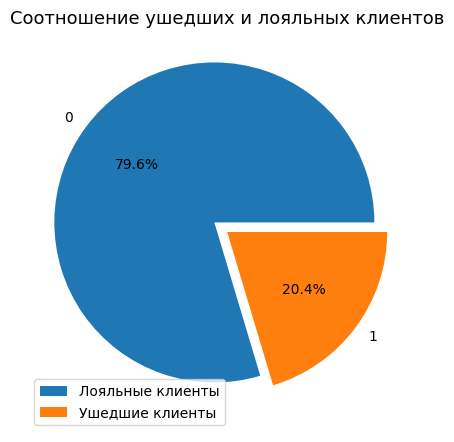

In [ ]:
exited_clients = churn_df['Exited'].value_counts()

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_clients,
    labels=exited_clients.index,
    autopct='%.1f%%',
    explode=[0.1,0]        
);
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=13)
axes.legend(['Лояльные клиенты', 'Ушедшие клиенты']);


#### Description
Из графика видно, что соотношение лояльных и ушедших клиентов 4:1.    
20% всех клиентов ушли из банка.

### Задание 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

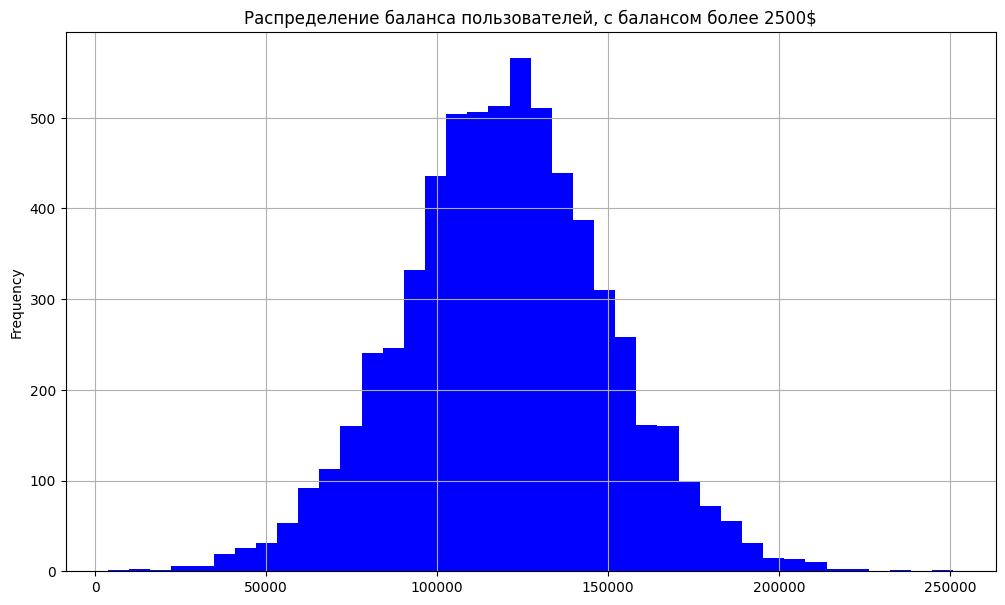

In [ ]:
balance_more_2500 = churn_df[churn_df['Balance'] > 2500]

balance_more_2500['Balance'].plot(
    kind='hist',
    figsize=(12, 7),
    title='Распределение баланса пользователей, с балансом более 2500$',
    grid=True,
    color='blue',
    bins=40
);

#### Description
На кграфике видно нормальное распределение.   
Средний баланс клиентов (с болансом более 2500$ на счету) 125 000$

### Задание 9.3.
 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

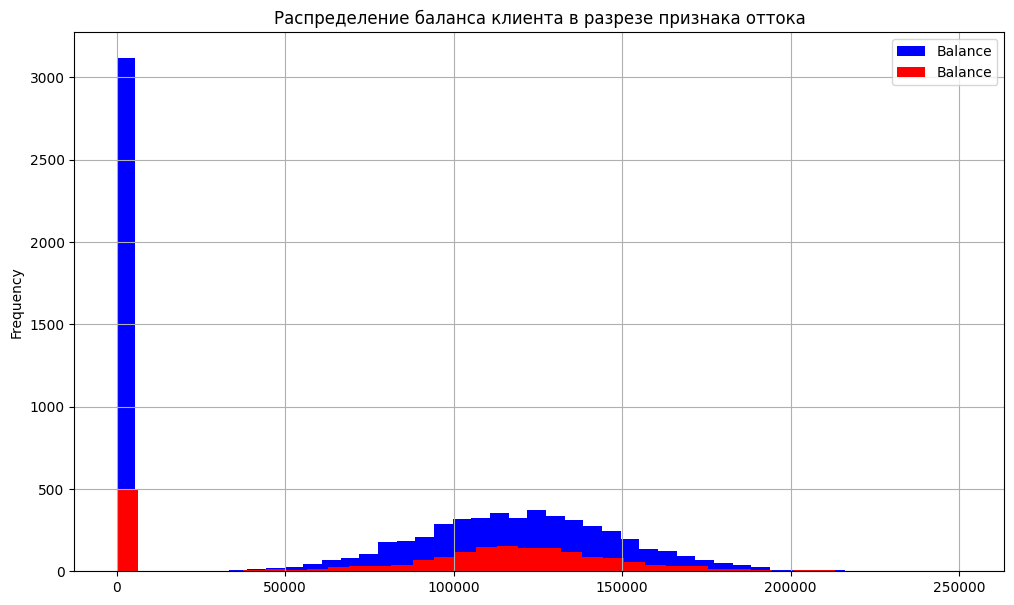

In [ ]:
loyal_client = churn_df[churn_df['Exited'] == 0]
exited_client = churn_df[churn_df['Exited'] == 1]

loyal_client['Balance'].plot(
    kind='hist',
    figsize=(12, 7),
    title='Pаспределение баланса клиента в разрезе признака оттока',
    grid=True,
    color='blue',
    legend='Лояльные клиенты',
    bins=40
);
exited_client['Balance'].plot(
    kind='hist',
    figsize=(12, 7),
    title='Pаспределение баланса клиента в разрезе признака оттока',
    grid=True,
    color='red',
    legend='Ушедшие клиенты',
    bins=40
);